# Ising model (Lenz–Ising model)

The Ising model, named after [Ernst Ising](https://en.wikipedia.org/wiki/Ernst_Ising) and [Wilhelm Lenz](https://en.wikipedia.org/wiki/Wilhelm_Lenz), represents a binary material on a lattice using spins $s_i \in \{+1,-1\}$ at sites $i$. Neighbouring spins interact via a coupling $J$; aligned neighbours lower the energy, while misaligned neighbours raise it. With optional distance weights $w_{ij}$ (e.g. $w_{ij}=1$ for first neighbours and $w_{ij}=1/r_{ij}^2$ for second neighbours), the Hamiltonian is
$E(\mathbf{s}) \;=\; -J \sum_{\langle i,j\rangle} w_{ij}\, s_i s_j$,
where $\langle i,j\rangle$ indicates the chosen neighbour set. 

This model is a convenient abstraction for two-phase morphologies (e.g. donor/acceptor, spin up/down) because interfacial cost emerges naturally from unlike neighbours.


In [2]:
import numpy as np
import matplotlib.pyplot as plt

### Initilise random lattice

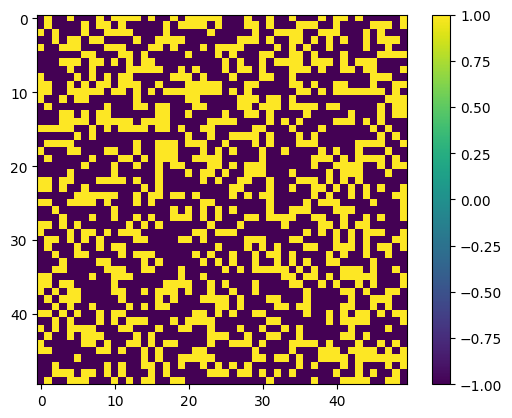

In [3]:
N = 50 # size of the lattice
p_ratio = 0.6 # ratio of +1 spins

init_random = np.random.random((N,N))
lattice = np.zeros((N, N))
lattice[init_random>=1-p_ratio] = 1
lattice[init_random<p_ratio] = -1
plt.imshow(lattice) 
plt.colorbar()

### Lattice Energy
- Computes the Hamiltonian of the 2‑D Ising lattice by summing nearest-neighbour spin interactions.
$$
  E = -\tfrac{1}{2}\sum_{i,j} s_{i,j}\big(s_{i+1,j} + s_{i-1,j} + s_{i,j+1} + s_{i,j-1}\big)
$$
  where $(s_{i,j}\in\{-1,+1\})$. The factor $(\tfrac{1}{2})$ prevents double-counting of bonds.
- Iterates over interior lattice sites, accumulates the local energy contributions, and returns total \(E\).


In [4]:
def get_energy(lattice):
    E = np.zeros((N, N))
    for i in range(1,N-1):
        for j in range(1,N-1):
            E[i][j] = -(1/2)*lattice[i,j]*(lattice[i+1,j]
                                           +lattice[i-1,j]
                                           +lattice[i,j+1]
                                           +lattice[i,j-1]) 
    return E.sum()

In [5]:
get_energy(lattice) 

np.float64(-180.0)

### Metropolis-Hasting algorithm
Implements one Monte Carlo sweep using the [Metropolis–Hastings](https://academic.oup.com/biomet/article-abstract/57/1/97/284580?redirectedFrom=fulltext) acceptance criterion at inverse temperature $(\beta J)$.\
For each step:
- Randomly choose lattice site $(x,y)$ and propose flipping $(s_{x,y}\rightarrow -s_{x,y})$.
- Compute the local energy change  
$$\Delta E = 2\,s_{x,y} \sum_{(x',y')\in\mathcal{N}(x,y)} s_{x',y'}$$
where $\mathcal{N}(x,y)$ is the nearest neighbours.
- Accept the flip with probability $\min\{1, \exp(-\beta J\,\Delta E)\}$

In [6]:
def metropolis(spin_arr, times, BJ, energy):
    spin_arr = spin_arr.copy()
    net_spins = np.zeros(times-1)
    net_energy = np.zeros(times-1)
    
    for t in range(times-1):
        # pick random point on array and flip spin
        x = np.random.randint(0,N)
        y = np.random.randint(0,N)
        
        spin_i = spin_arr[x,y] #initial spin at selected x,y
        spin_f = spin_i*-1 #proposed spin flip
        
        # compute change in energy
        E_i = 0
        E_f = 0
        
        if x>0:
            E_i += -spin_i*spin_arr[x-1,y]
            E_f += -spin_f*spin_arr[x-1,y]
        if x<N-1:
            E_i += -spin_i*spin_arr[x+1,y]
            E_f += -spin_f*spin_arr[x+1,y]
        if y>0:
            E_i += -spin_i*spin_arr[x,y-1]
            E_f += -spin_f*spin_arr[x,y-1]
        if y<N-1:
            E_i += -spin_i*spin_arr[x,y+1]
            E_f += -spin_f*spin_arr[x,y+1]
            
    # change state with designated probabilities
        dE = E_f - E_i
        if (dE>0):
            if np.random.random() < np.exp(-BJ*dE):
                spin_arr[x,y]=spin_f
                energy += dE
        elif dE<=0:
            spin_arr[x,y]=spin_f
            energy += dE
            
        net_spins[t] = spin_arr.sum()
        net_energy[t] = energy
            
    return net_spins, net_energy

In [7]:
spins_low_temp, energies_low_temp = metropolis(lattice, 10000000, 0.7, get_energy(lattice))

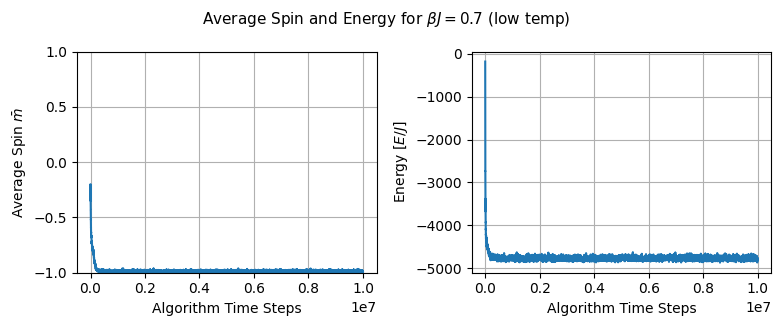

In [8]:
fig, axes = plt.subplots(1, 2, figsize=(8,3))
ax = axes[0]
ax.plot(spins_low_temp/N**2)
ax.set_xlabel('Algorithm Time Steps')
ax.set_ylabel(r'Average Spin $\bar{m}$')
ax.grid()
ax.set_ylim([-1, 1])
ax = axes[1]
ax.plot(energies_low_temp)
ax.set_xlabel('Algorithm Time Steps')
ax.set_ylabel(r'Energy $[E/J]$')
ax.grid()
fig.tight_layout()
fig.suptitle(r'Average Spin and Energy for $\beta J=$0.7 (low temp)', y=1.07, size=11)
plt.show()

In [9]:
spins_high_temp, energies_high_temp = metropolis(lattice, 10000000, 0.2, get_energy(lattice))

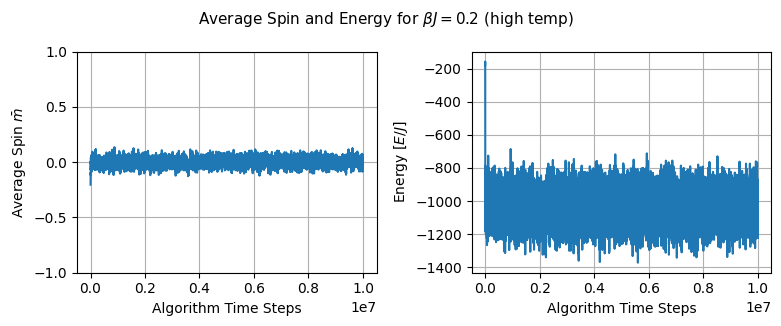

In [10]:
fig, axes = plt.subplots(1, 2, figsize=(8,3))
ax = axes[0]
ax.plot(spins_high_temp/N**2)
ax.set_xlabel('Algorithm Time Steps')
ax.set_ylabel(r'Average Spin $\bar{m}$')
ax.grid()
ax.set_ylim([-1, 1])
ax = axes[1]
ax.plot(energies_high_temp)
ax.set_xlabel('Algorithm Time Steps')
ax.set_ylabel(r'Energy $[E/J]$')
ax.grid()
fig.tight_layout()
fig.suptitle(r'Average Spin and Energy for $\beta J=$0.2 (high temp)', y=1.07, size=11)
plt.show()

# Further reading

- [Ernst Ising, Contribution to the Theory of Ferromagnetism](https://www.hs-augsburg.de/~harsch/anglica/Chronology/20thC/Ising/isi_fm00.html)
- Metropolis, N.; Rosenbluth, A.W.; Rosenbluth, M.N.; Teller, A.H.; Teller, E. (1953). "Equation of State Calculations by Fast Computing Machines". Journal of Chemical Physics. 21 (6): 1087–1092.
- Rosenbluth, Marshall; Rosenbluth, Arianna (1954). "Further Results on Monte Carlo Equations of State". The Journal of Chemical Physics. 22 (5): 881–884.
- Hastings, W.K. (1970). "Monte Carlo Sampling Methods Using Markov Chains and Their Applications". Biometrika. 57 (1): 97–109.